In [35]:
import charge_separator as cs
import sys
sys.path.append('/Users/jonathontordilla/Desktop/hombom24/archive-analysis/lcls-tools-plots/archiver_plotter')
import archiver_plotter as ap # type: ignore
import matplotlib.pyplot as plt

In [36]:
"""Create a correlation DataFrame, then separate it by charges."""
start = "2024/07/02 12:00:00"
end = "2024/07/02 14:00:00"
charge_pv = "TORO:GUNB:360:CHRG"
ycor_pv = "YCOR:GUNB:293:BACT"
homc1_pv = "SCOP:AMRF:RF01:AI_MEAS1"
aplot = ap.ArchiverPlotter()
csep = cs.ChargeSeparator()

# Create a correlation DataFrame
df_charge = aplot.create_df(charge_pv, start, end)  # charge DataFrame
df_ycor = aplot.create_df(ycor_pv, start, end)  # YCOR DataFrame
df_hom1 = aplot.create_df(homc1_pv, start, end)  # HOM DataFrame
df_charge_ycor = aplot.create_correlation_df(df_charge, df_ycor)
df_correl = aplot.create_correlation_df(df_charge_ycor, df_hom1)  # correlation DataFrame

# Create a charge separated list of DataFrames
df_list = csep.separate_df_by_charges(df_correl, charge_pv, tolerance=0.5)

Text(0.5, 1.0, 'HOM C1 vs. YCOR for 0.028 pC')

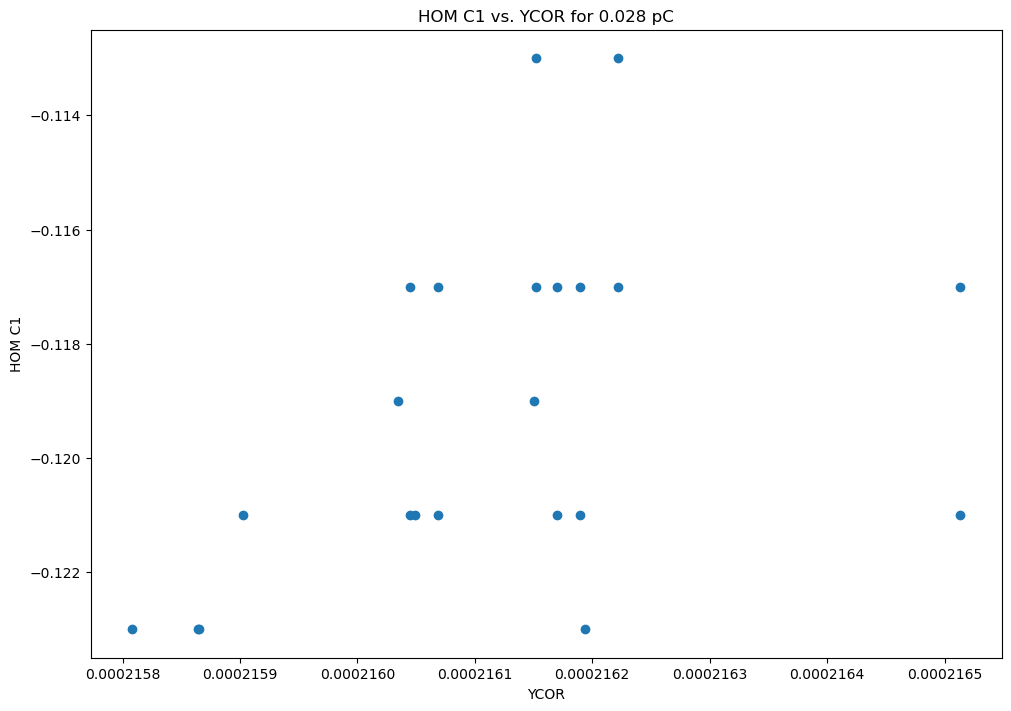

In [37]:
"""Plot one of the DataFrames"""
fig, ax = plt.subplots(figsize=(10, 7), layout='constrained')
ax.scatter(df_list[0][ycor_pv], df_list[0][homc1_pv], marker='o')
plt.xlabel("YCOR")
plt.ylabel("HOM C1")
plt.title(f"HOM C1 vs. YCOR for {round(df_list[0][charge_pv].tolist()[0], 3)} pC")